In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from scipy.io import loadmat

**load all datafile**

In [64]:
env = ["pusher", "reacher", "halfcheetah"]
algo = ["PETS", "POPLINA_INIT", "POPLINA_REPLAN", "POPLINP_BC", "POPLINP_AVG"] 

all_file_list = glob.glob(os.path.join(os.getcwd(),'log/*/*/logs.mat'))
print(len(all_file_list))

45


**Eaxmple plot with one algo and one env**

Concatenate all random seeds, and concert to DataFrame
 (3, 50) 
            0           1           2           3           4           5   \
0 -167.971610 -159.240237 -219.614834 -213.779293 -181.962452 -172.442095   
1 -164.980789 -191.979808 -180.852294 -133.175099 -128.802440 -174.875443   
2 -183.249846 -352.231994 -148.763291 -130.717456 -146.644812 -136.313813   

           6           7           8           9   ...          40  \
0 -113.722766 -139.858375 -130.680886 -129.246161  ...  -99.260255   
1 -121.191207 -114.156978 -154.233417 -145.193985  ... -187.720754   
2 -160.239154 -113.195947 -126.943302  -97.843803  ...  -70.706623   

           41          42          43         44         45         46  \
0  -93.791558  -93.955026  -98.860928 -88.760802 -90.034155 -92.888979   
1 -103.252770 -141.509719  -93.804785 -95.796350 -58.266635 -89.696173   
2  -99.086193  -69.418435 -131.796291 -62.804593 -64.287832 -70.054782   

          47          48          49  
0 -89.96

Text(0.5, 1.0, 'POPLINA_INIT_pusher')

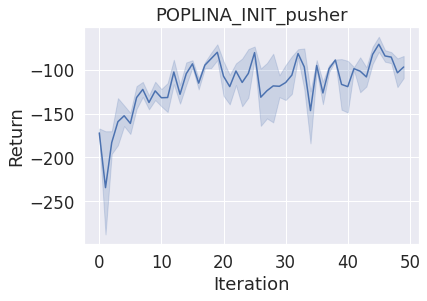

In [59]:
sns.set(style="darkgrid", font_scale=1.5)

file_list = [name for name in all_file_list if "pusher" in name]
file_list = [name for name in file_list if "POPLINA_INIT" in name]
# print(env[j], algo[i], len(file_list))

# loading all random seeds results
data = []
for name in file_list:
    returns = loadmat(name)['returns']
    data.append(returns)

# concat along first dim, convert to DF 
data = np.concatenate(data,axis=0)
data = pd.DataFrame(data) 
print("Concatenate all random seeds, and concert to DataFrame\n", data.shape, "\n",data) # (3, 50)
data = data.melt(var_name="Iteration", value_name="Return") # (150,2)
print("Using melt unpivoit column to row \n", data.shape, "\n", data)

# plot
sns.lineplot(x="Iteration", y="Return", data=data, ci=68)
plt.title("POPLINA_INIT_pusher")

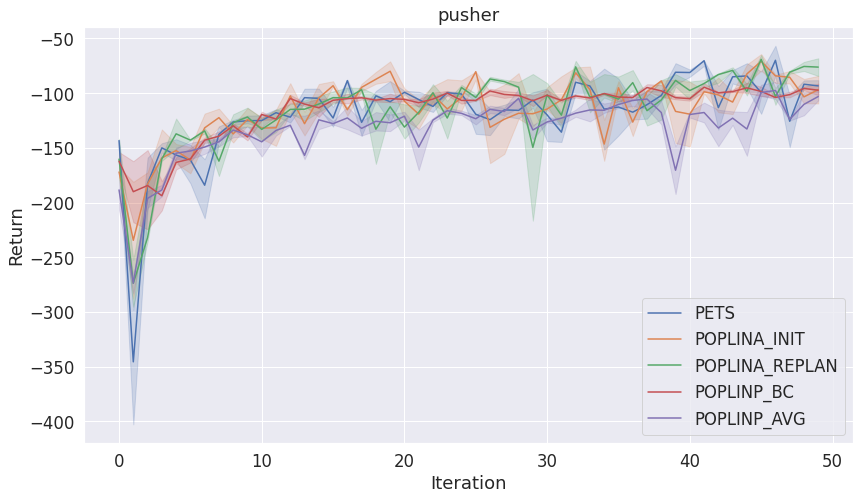

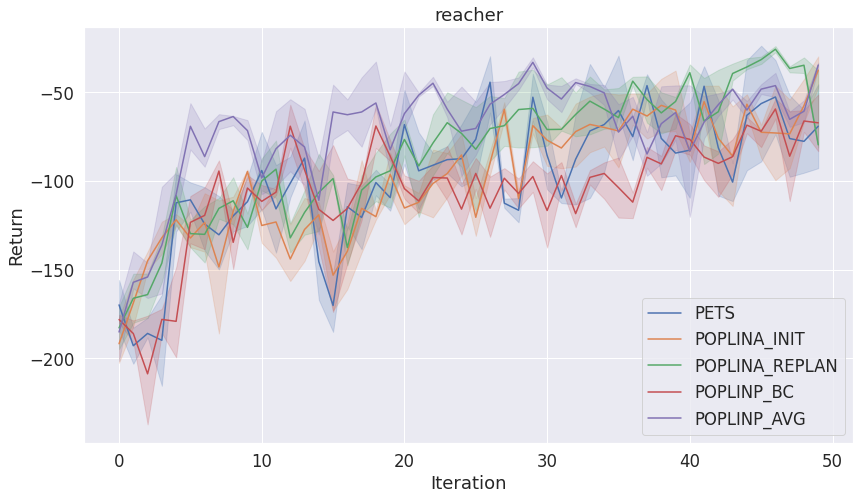

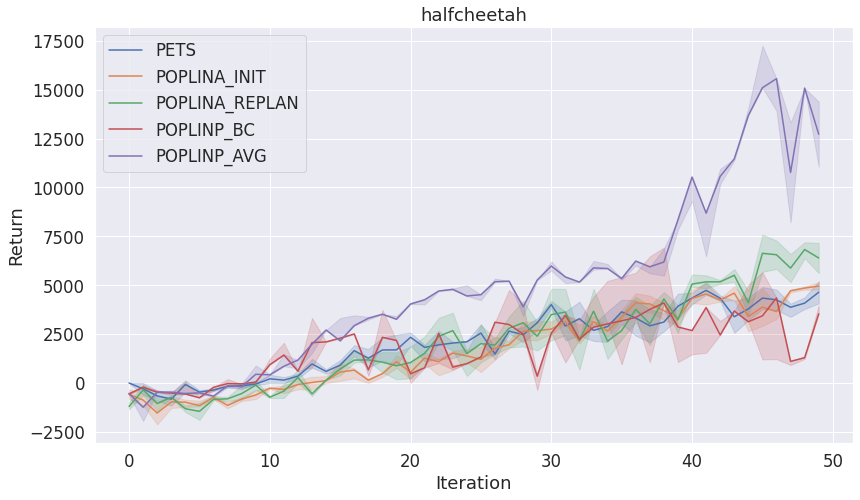

In [63]:
sns.set(style="darkgrid", font_scale=1.5)

for j in range(len(env)):
    fig = plt.figure(figsize=(12,7))
    for i in range(len(algo)):
        file_list = [name for name in all_file_list if env[j] in name]
        file_list = [name for name in file_list if algo[i] in name]
        data = []
        # print(env[j], algo[i], len(file_list))
        for name in file_list:
            returns = loadmat(name)['returns']
            data.append(returns)
        data = np.concatenate(data,axis=0)
        data = pd.DataFrame(data).melt()
        sns.lineplot(x="variable", y="value", data=data, label=algo[i],ci=50)
    plt.title(env[j])
    plt.legend(loc='best')
    plt.tight_layout(pad=0.5)
    plt.xlabel("Iteration")
    plt.ylabel("Return")
    plt.show()